<a href="https://www.kaggle.com/code/tanavbajaj/naive-bayes?scriptVersionId=100218019" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Naive Bayes

It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

Let's dive a little into the maths behind Naive Bayes. 

Starting with the **Bayes theorem**

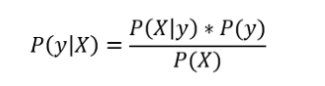

Here X represents the independent variables while y represents the output or dependent variable. The assumption works that all variables are completely independent of each other hence X translates to x1, x2 x3 and so on

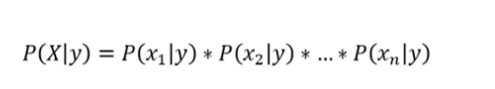

So, the proportionality becomes 

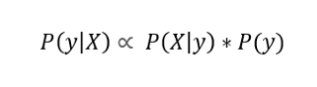

Combining this for all values of x

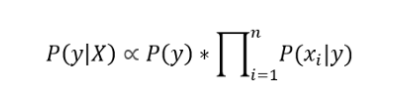

Now the target for the Naive Bayes algorithm is to find the class which has maximum probability for the target. Which refers to finding the maximum value of y. For this argmax operation is used. 

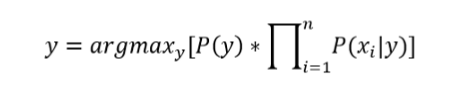



# Importing the libraries 

In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB

# Reading the dataset

In [2]:
dataframe = pd.read_csv("../input/titanic/train.csv")
test_dataframe = pd.read_csv("../input/titanic/test.csv")
passangerId = test_dataframe["PassengerId"]


# Taking only the independent and useful data into the final data frame

## Name, Ticket , Passanger ID have almost no correlation to the outcome

In [3]:
final_dataframe= dataframe[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']]
final_dataframe = final_dataframe.dropna()
final_dataframe.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Labeling the values in the “Sex” column of the dataset to numbers

In [4]:
final_dataframe["Sex"] = final_dataframe["Sex"].replace(to_replace=final_dataframe["Sex"].unique(), value = [1 , 0])

# One hot encoding
This is an encoding algorithm in the sklearn library to get categorical data into various columns and make encode it in a way that the dataset can be sent to the machine learning model 

In [5]:
final_dataframe = pd.get_dummies(final_dataframe, drop_first=True) 

# Creating the training and testing datasets

In [6]:
train_y = final_dataframe["Survived"]
train_x = final_dataframe[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked_Q','Embarked_S']]

In [7]:
from sklearn.model_selection import train_test_split

train_data, val_data, train_target, val_target = train_test_split(train_x,train_y, train_size=0.8)

In [8]:
model = GaussianNB()
model.fit(train_data,train_target)
val_pred= model.predict(val_data)

In [9]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(val_target, val_pred)*100)+ "%")

Model accuracy score: 76.2238%


# Working on the Test Dataset

In [10]:
final_test_dataframe =test_dataframe[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']].copy()

# Fill na values with mean values from corresponding columns

In [11]:
age_mean = final_test_dataframe.Age.mean()
fare_mean = final_test_dataframe.Fare.mean()
final_test_dataframe.fillna({"Age":age_mean,"Fare":fare_mean},inplace=True)

# One Hot Encoding and Labelling the test dataset

In [12]:
final_test_dataframe = pd.get_dummies(final_test_dataframe,columns=["Embarked"],drop_first=True) 
final_test_dataframe["Sex"] = final_test_dataframe["Sex"].replace(to_replace=final_test_dataframe["Sex"].unique(), value = [1 , 0])

# Train Test Split

In [13]:
train_y = final_dataframe["Survived"]
train_x = final_dataframe[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked_Q','Embarked_S']]

test_x = final_test_dataframe

#  Training the Model and Getting Predictions

In [14]:
model = GaussianNB()

model.fit(train_x, train_y)

predictions = model.predict(test_x)

# Submitting the results to the Competition

In [15]:
results = pd.DataFrame({"PassengerId":passangerId,"Survived":predictions})
results.to_csv("submissions.csv",index=False)

In [16]:
results.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
